In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')

from HOD import *
from ilc_params import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# Setup

In [2]:
color = "red" 
nu_list = 217,353,545
nu_list_str = '217,353,545'

# nu_list = 220,280,350,550,8501
# nu_list_str = '220,280,350,550,850'

In [3]:
cib_flux={}
# flux cut, Table 1 in https://arxiv.org/pdf/1309.0382.pdf
#Planck
cib_flux['100'] = 400
cib_flux['143'] = 350
cib_flux['217'] = 225
cib_flux['353'] = 315
cib_flux['545'] = 350
cib_flux['857'] = 710
cib_flux['3000'] = 1000

#CCAT prime, Fiona's assumptions
# cib_flux['93'] = 400
# cib_flux['145'] = 350
# cib_flux['225'] = 225
# cib_flux['220'] = 225
# cib_flux['280'] = 225
# cib_flux['350'] = 315
# cib_flux['550'] = 350
# cib_flux['545'] = 350
# cib_flux['850'] = 710

#SO 
cib_flux['93'] = 7
cib_flux['145'] = 15
cib_flux['225'] = 20
cib_flux['280'] = 25

cib_flux_list = []
keys = list(cib_flux.keys())

for i,nu in enumerate(nu_list):
    if str(nu) in keys: 
        cib_flux_list.append(cib_flux[str(nu)])
        print(cib_flux[str(nu)])
    else: 
        cib_flux_list.append(0.3)
        print(0)
print("Flux cuts: ", cib_flux_list)

str(list(cib_flux_list))[1:-1]

225
315
350
Flux cuts:  [225, 315, 350]


'225, 315, 350'

In [4]:
shot_noise={}
# shot_noise, Table 1 in https://arxiv.org/pdf/1309.0382.pdf
shot_noise['217'] = 21
shot_noise['353'] = 262
shot_noise['545'] = 1690
shot_noise['857'] = 5364


In [5]:
if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red
    
hod_pdict['galaxy_sample_id']

'red'

# Dictionaries

In [6]:
p18_cosmo = {
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


# # parameters for Cosmology planck 14, https://arxiv.org/pdf/1303.5076.pdf, best-fit
p14_dict={}
p14_dict['Omega_cdm'] = 0.3175-0.022068/0.6711/0.6711
p14_dict['omega_b'] = 0.022068
p14_dict['h'] = 0.6711
p14_dict['A_s'] = 2.2e-9
p14_dict['n_s'] = .9624
p14_dict['k_pivot'] = 0.05
p14_dict['tau_reio'] = 0.0925

p14_dict['N_ncdm'] = 1
p14_dict['N_ur'] = 0.00641
p14_dict['deg_ncdm'] = 3
p14_dict['m_ncdm'] = 0.02
p14_dict['T_ncdm'] = 0.71611



# Boris benchmark for Fiona Model 
p_dict = {}
p_dict['mass function'] = 'T10'
p_dict['concentration parameter'] = 'D08'
p_dict['delta for cib'] = '200m'
p_dict['hm_consistency'] = 1
p_dict['damping_1h_term'] = 0

# mass bounds
p_dict['M_min_cib'] = 1e8*p18_pdict['h']
p_dict['M_max_cib'] = 1e16*p18_pdict['h']
# redshift bounds
p_dict['z_min'] = 0.07
p_dict['z_max'] = 6. # fiducial for MM20 : 6
p_dict['freq_min'] = 10.
p_dict['freq_max'] = 5e4 # fiducial for MM20 : 6
# HOD parameters for CIB
p_dict['M_min_HOD_cib'] = pow(10.,10)
#p_dict['M1_prime_HOD'] =pow(10.,125.1536196)*p_dict['h']


# CIB parametes see McCarthy & Madhavacheril 2020
p_dict['Redshift evolution of dust temperature'] =  0.36
p_dict['Dust temperature today in Kelvins'] = 24.4
p_dict['Emissivity index of sed'] = 1.75
p_dict['Power law index of SED at high frequency'] = 1.7
p_dict['Redshift evolution of L − M normalisation'] = 3.6
p_dict['Most efficient halo mass in Msun'] = pow(10.,12.6)
p_dict['Normalisation of L − M relation in [Jy MPc2/Msun]'] = 6.4e-8
p_dict['Size of of halo masses sourcing CIB emission'] = 0.5

# precision parameters
p_dict['pressure_profile_epsabs'] = 1.e-8
p_dict['pressure_profile_epsrel'] = 1.e-3
# precision for redshift integal
p_dict['redshift_epsabs'] = 1e-40#1.e-40
p_dict['redshift_epsrel'] = 1e-4#1.e-10 # fiducial value 1e-8
# precision for mass integal
p_dict['mass_epsabs'] = 1e-40 #1.e-40
p_dict['mass_epsrel'] = 1e-4#1e-10
# precision for Luminosity integral (sub-halo mass function)
p_dict['L_sat_epsabs'] = 1e-40 #1.e-40
p_dict['L_sat_epsrel'] = 1e-3#1e-10

p_dict['z_max_pk'] = p_dict['z_max']

# multipole array
p_dict['dell'] = 30
p_dict['ell_max'] = 8000.
p_dict['ell_min'] = 2.


# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}

websky_common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
                    'ell_max': 8000.,
                    'ell_min': 2.,
                    'dlogell':0.2,
}



## 2nd HOD dictionaries 

In [7]:
green_pdict={}
green_pdict['alpha_s_HOD']=      2.079758  
green_pdict['sigma_log10M_HOD']=      0.054664 
green_pdict['M1_prime_HOD']= 10**  13.561896
green_pdict['M_min_HOD']= 10** 11.886459 
green_pdict['x_out_truncated_nfw_profile_satellite_galaxies']=  1.756186 
A_shot_noise_green = 10**(   -6.75017 )

blue_pdict={}
blue_pdict['alpha_s_HOD']=  1.061623
blue_pdict['sigma_log10M_HOD']=   0.019955
blue_pdict['M1_prime_HOD']= 10** 12.608837
blue_pdict['M_min_HOD']= 10** 11.692076
blue_pdict['x_out_truncated_nfw_profile_satellite_galaxies']=     1.8

red_pdict={}
red_pdict['alpha_s_HOD']=      1.746312      
red_pdict['sigma_log10M_HOD']=      0.063493     
red_pdict['M1_prime_HOD']= 10**  13.18241
red_pdict['M_min_HOD']= 10**    12.180992     
red_pdict['x_out_truncated_nfw_profile_satellite_galaxies']=      1.020558  
A_shot_noise_red = 10**(   -5.540912)
# red_pdict={}
# red_pdict['alpha_s_HOD']=    1.564189     
# red_pdict['sigma_log10M_HOD']=        0.091906   
# red_pdict['M1_prime_HOD']= 10**  13.178383 
# red_pdict['M_min_HOD']= 10**     12.353098      
# red_pdict['x_out_truncated_nfw_profile_satellite_galaxies']=   1.641144 


if color=="blue":
    hod2_pdict = blue_pdict
if color=="green":
    hod2_pdict = green_pdict
if color=="red":
    hod2_pdict = red_pdict  
    

In [8]:
hod_pdict

{'galaxy_sample': 'unwise',
 'galaxy_sample_id': 'red',
 'UNWISE_dndz_file': '/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt',
 'M0_HOD': 0,
 'x_out_truncated_nfw_profile': 1.0,
 'M_min_gal': 700000000.0,
 'M_max_gal': 3500000000000000.0,
 'alpha_s_HOD': 1.758605,
 'sigma_log10M_HOD': 0.071076,
 'M1_prime_HOD': 36977538677579.63,
 'M_min_HOD': 3601819956258.6553,
 'x_out_truncated_nfw_profile_satellite_galaxies': 1.018972}

In [9]:
hod2_pdict


{'alpha_s_HOD': 1.746312,
 'sigma_log10M_HOD': 0.063493,
 'M1_prime_HOD': 15219836954698.781,
 'M_min_HOD': 1517022422616.2268,
 'x_out_truncated_nfw_profile_satellite_galaxies': 1.020558}

In [10]:
path_ps = "/Users/aleksandra/software/class_sz/sz_auxiliary_files/cib_files/"

# # in MJy2/sr
ell_ws, ws_cib145 = np.loadtxt(path_ps+"cl_cib_cib_145_websky_l_cl_090322.txt").T
ell_ws, ws_cib217 = np.loadtxt(path_ps+"cl_cib_cib_217_websky_l_cl_090322.txt").T
ell_ws, ws_cib353 = np.loadtxt(path_ps+"cl_cib_cib_353_websky_l_cl_090322.txt").T
ell_ws, ws_cib545 = np.loadtxt(path_ps+"cl_cib_cib_545_websky_l_cl_090322.txt").T

path_ps = "/Users/aleksandra/software/ILC/websky_measurements/"
ell_ws, ws_cib217 = np.loadtxt(path_ps+"websky_cib217_anafast_Jysr_nside4096.txt")
ell_ws, ws_cib353 = np.loadtxt(path_ps+"websky_cib353_anafast_Jysr_nside4096.txt")
ell_ws, ws_cib545 = np.loadtxt(path_ps+"websky_cib545_anafast_Jysr_nside4096.txt")
pixwin = np.loadtxt(path_ps+"pixwin_hp_nside4096.txt")

In [11]:
len(pixwin)
pixwin

array([1.        , 1.        , 0.99999999, ..., 0.6464745 , 0.64642656,
       0.64637861])

# Compute class_sz

## Websky with our setting

In [12]:
#websky 
N = Class()
N.set(p18_pdict)
N.set(websky_tsz_pdict)
N.set(websky_cib_pdict)
N.set(common_settings)

N.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h,dcib0dz',
        'class_sz_verbose':0,
        'Normalisation of L − M relation in [Jy MPc2/Msun]': 5.061102571695613e-07, # chosen by hand 
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
N.compute()

In [13]:
cl_cib_cib = N.cl_cib_cib()
cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) + np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
ell = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

## Websky with original settings

In [64]:
#websky cosmo
W = Class()
W.set(websky_cosmo)
W.set(websky_tsz_pdict)
W.set(websky_cib_pdict)
W.set(websky_common_settings)

W.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h,dcib0dz',
        'class_sz_verbose':0,
        'Normalisation of L − M relation in [Jy MPc2/Msun]': 4.461102571695613e-07,
        'dlogell':0.2,
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
W.compute()

cl_cib_cib1 = W.cl_cib_cib()

In [67]:
#cl_cib_cib1['217x217']['ell']

## Fiona with our HMF etc

In [15]:
M = Class()

M.set(hod_pdict)
M.set(websky_tsz_pdict)
M.set(p_dict)
M.set(p18_pdict)
M.set(common_settings)

M.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h',
        #'mass function': 'T10',
        #'delta for cib': '200m',
        #'concentration parameter' : 'D08',
        #'M_min_cib' : 1e8,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
M.compute()




In [16]:
cl_cib_cib_fiona = M.cl_cib_cib()
cib_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) + np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
ell_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

In [17]:
cib_fiona[:10]

array([7.65163290e+01, 7.64647108e+05, 1.73836751e+06, 2.70548886e+06,
       3.29961391e+06, 3.69835137e+06, 4.15289729e+06, 4.44789685e+06,
       4.65207615e+06, 4.89017331e+06])

# Plot compare

In [18]:
path_to_class = '/Users/aleksandra/software/class_sz/'

In [19]:
freq_cib_1 = 353
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_353 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_353 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [20]:
freq_cib_1 = 545
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_545 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_545 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [21]:
freq_cib_1 = 217
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_217 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_217 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

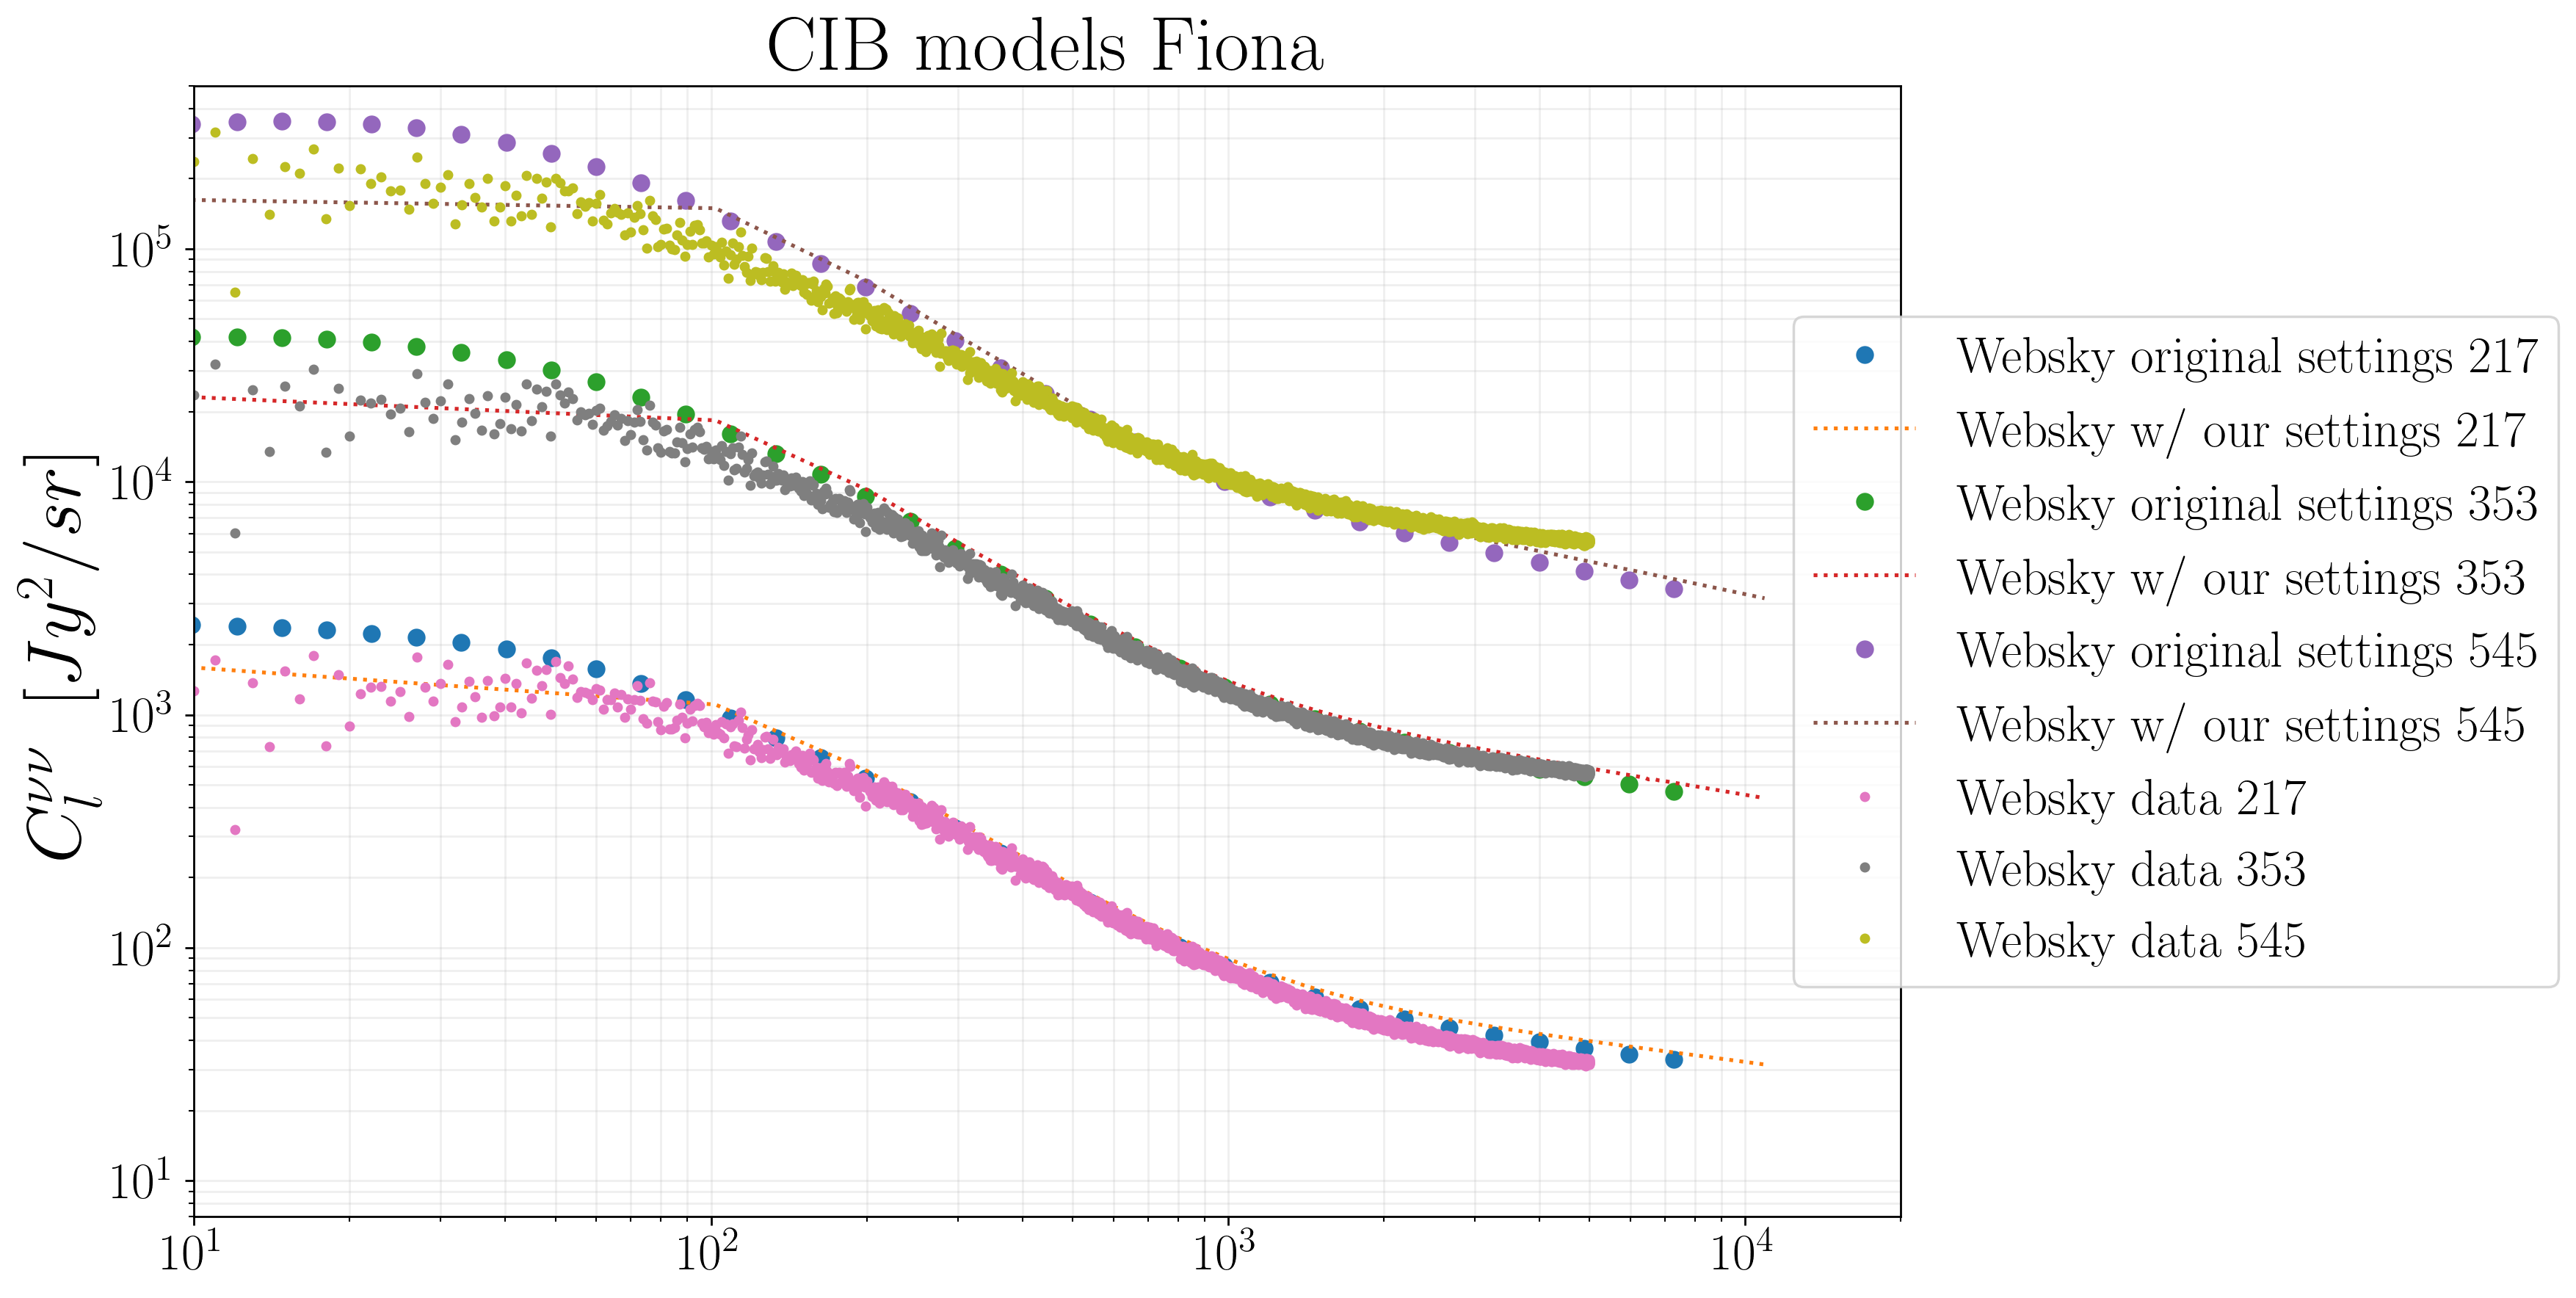

In [66]:
plt.figure(figsize=(12,8), dpi=250)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.title('CIB models Fiona ', fontsize=30)


for (i,nu) in enumerate(nu_list):
    #CIB fiona, our settings
    cib_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    dl_to_cl_f = ell_fiona*(ell_fiona+1)/2/np.pi
    #websky
    cib = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    dl_to_cl = ell*(ell+1)/2/np.pi
    #websky with websky cosmo
    cib1 = np.asarray(cl_cib_cib1[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib1[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell1 = np.asarray(cl_cib_cib1[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    dl_to_cl1 = ell1*(ell1+1)/2/np.pi
    #np.savetxt("/Users/aleksandra/Desktop/CIB_websky_original_class_sz_"+str(nu)+".txt",(ell1,cib1))
    plt.plot(ell1, cib1/dl_to_cl1 + shot_noise[str(nu)]*ell1/ell1, "o", label=r'Websky original settings %.1i'%(nu))
    plt.plot(ell, cib/dl_to_cl+ shot_noise[str(nu)]*ell/ell, ":", label=r'Websky w/ our settings %.1i'%(nu))
    #plt.plot(ell_fiona, cib_fiona/dl_to_cl_f +shot_noise[str(nu)]*ell_fiona/ell_fiona, "--", label=r'Fiona w/ our settings %.1i'%(nu))
#plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_217+cl_cib_cib_2h_MM20_217)/cl_to_dl_MM20,"o", label = "McCarthy et al 217")
#plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_353+cl_cib_cib_2h_MM20_353)/cl_to_dl_MM20,"o", label = "McCarthy et al  353")
#plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_545+cl_cib_cib_2h_MM20_545)/cl_to_dl_MM20,"o", label = "McCarthy et al  545")
plt.plot(ell_ws, 1e12*ws_cib217, ".", label = "Websky data 217")
plt.plot(ell_ws, 1e12*ws_cib353, ".", label = "Websky data 353")
plt.plot(ell_ws, 1e12*ws_cib545, ".", label = "Websky data 545")

plt.xlim(1.e1, 2.e4)
plt.ylim(7.e0, 5.e5)  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# Compare CIB to measurements from Lenz et al. 

In [54]:
## https://github.com/DanielLenz/PlanckCIB/blob/master/notebooks/inspecting_powerspectra.ipynb
# In addition to that, we provide the full CIB auto and cross power spectra for 353, 545, and 857 GHz in ``Cl_CIB_T1T2.csv``.
#This is derived on the NHI < 2.5e+20 mask. The units are Jy^2/sr.
import pandas as pd
file_lenz_cib = "/Users/aleksandra/Desktop/Cl_CIB_T1T2.csv"
df_cib_auto = pd.read_csv(file_lenz_cib , comment='#') 


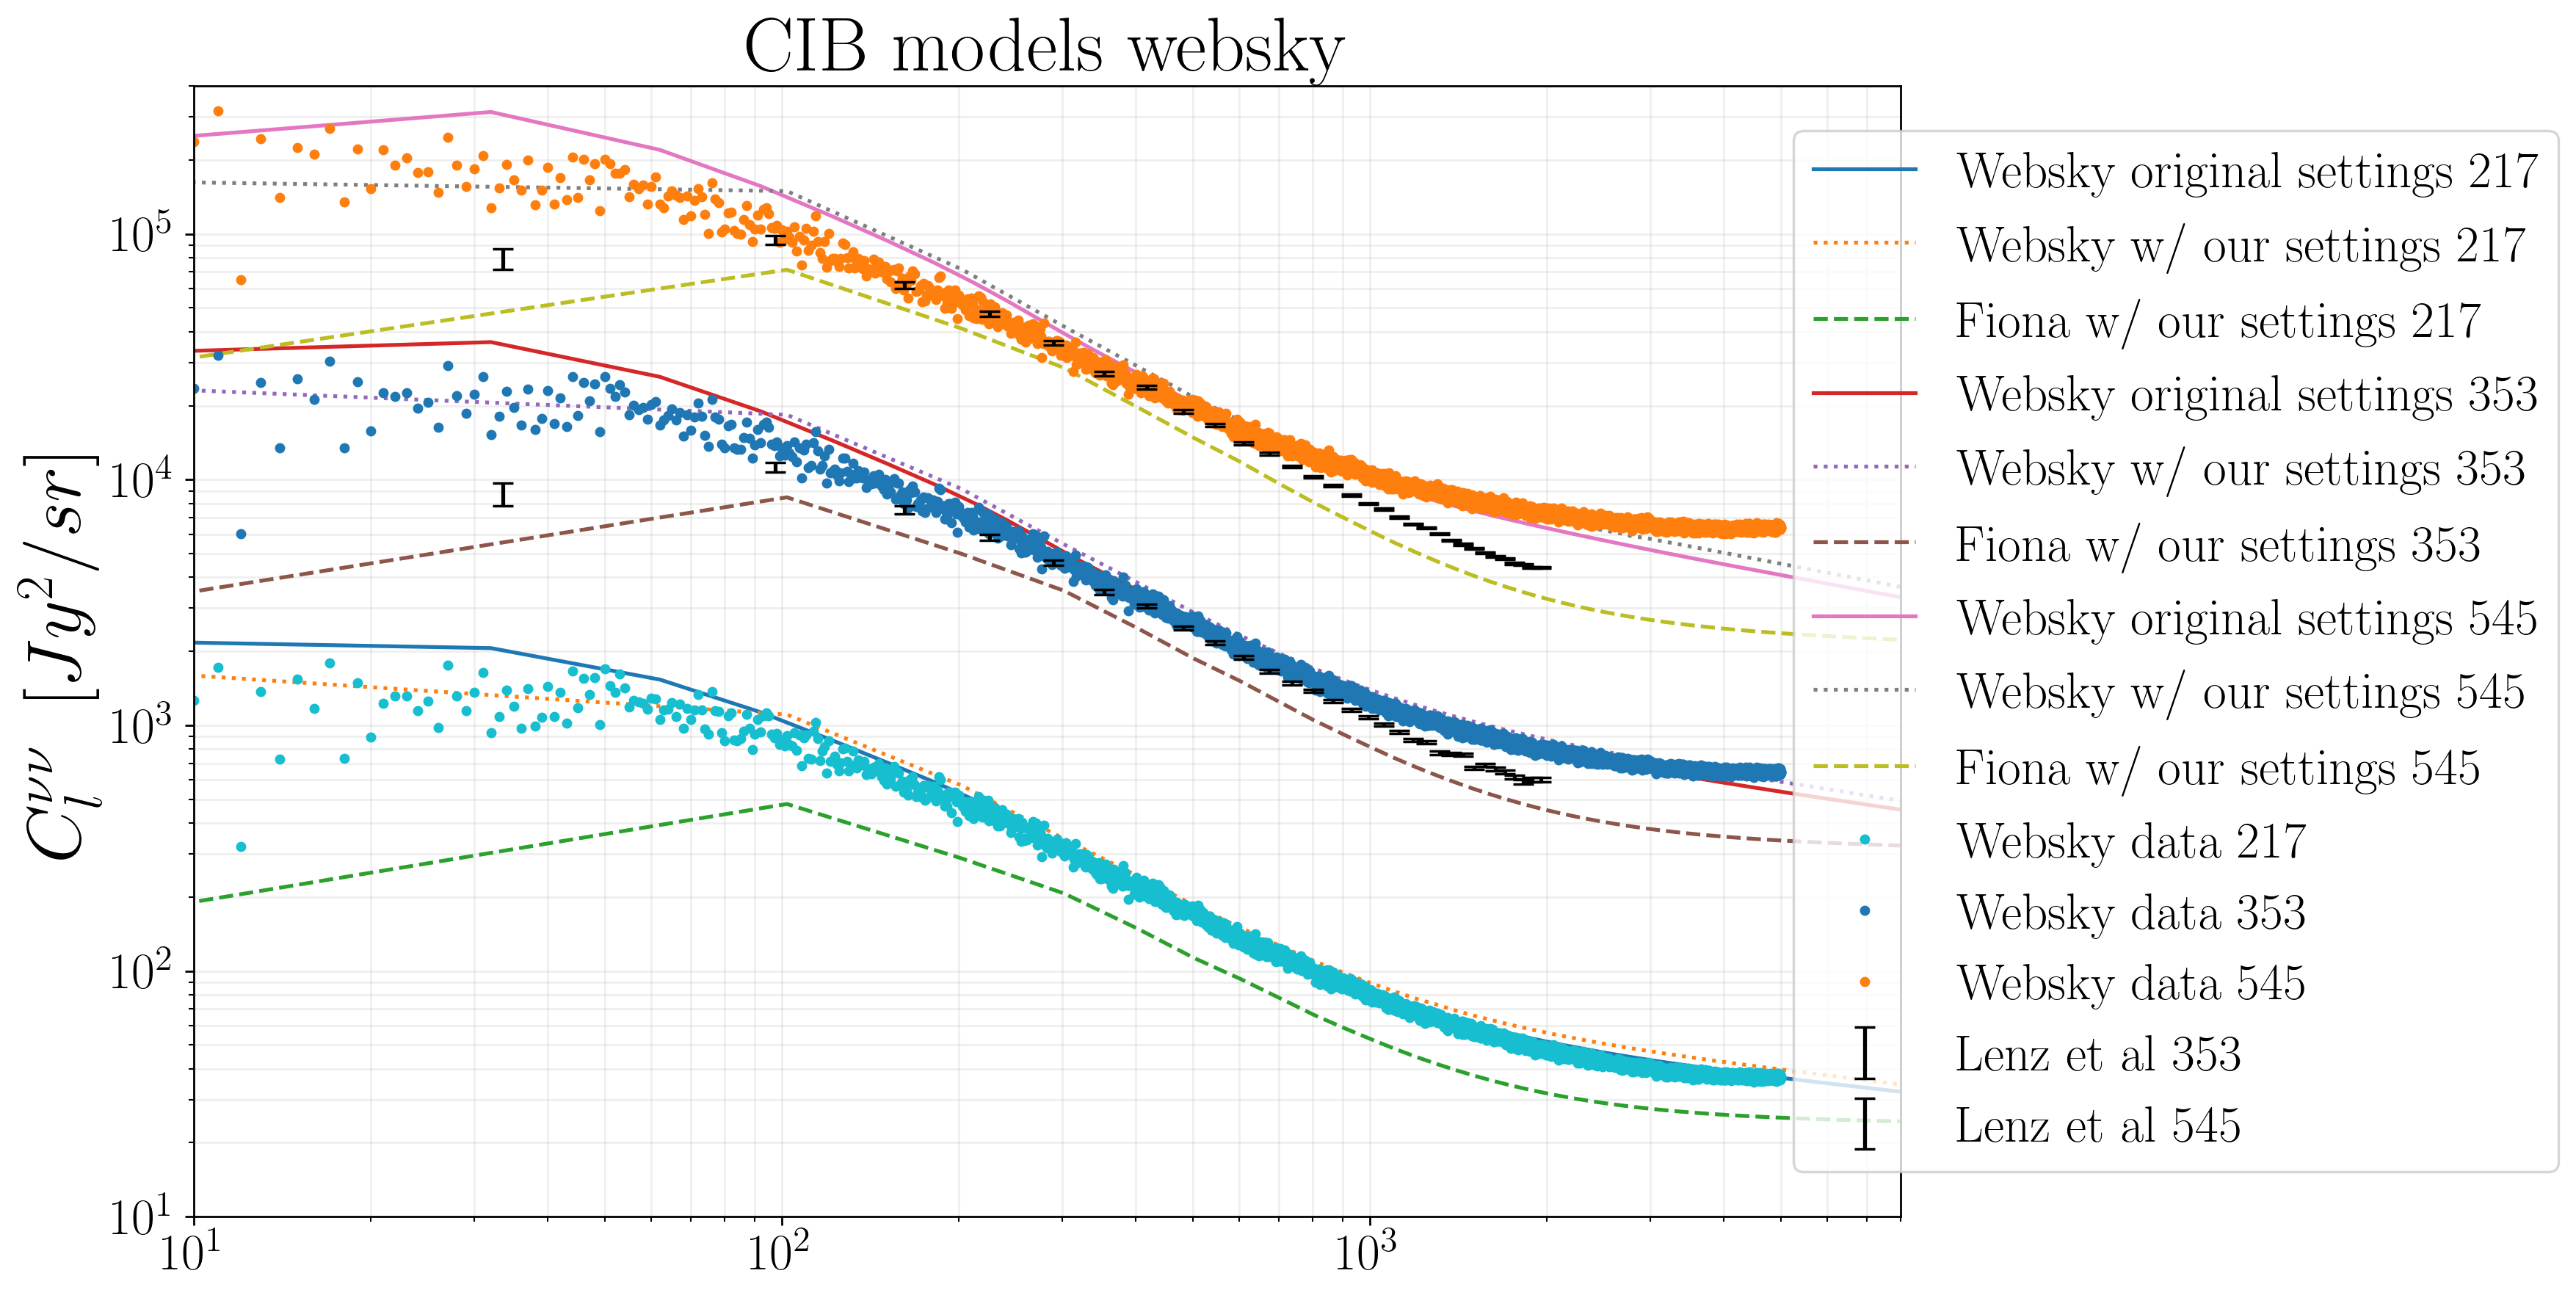

In [24]:
plt.figure(figsize=(12,8), dpi=250)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.title('CIB models websky ', fontsize=30)


for (i,nu) in enumerate(nu_list):
    #CIB fiona, our settings
    cib_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    dl_to_cl_f = ell_fiona*(ell_fiona+1)/2/np.pi
    #websky
    cib = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    dl_to_cl = ell*(ell+1)/2/np.pi
    #websky with websky cosmo
    cib1 = np.asarray(cl_cib_cib1[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib1[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell1 = np.asarray(cl_cib_cib1[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    dl_to_cl1 = ell1*(ell1+1)/2/np.pi
    
    plt.plot(ell1, cib1/dl_to_cl1 + shot_noise[str(nu)]*ell1/ell1, label=r'Websky original settings %.1i'%(nu))
    plt.plot(ell, cib/dl_to_cl+ shot_noise[str(nu)]*ell/ell, ":", label=r'Websky w/ our settings %.1i'%(nu))
    plt.plot(ell_fiona, cib_fiona/dl_to_cl_f +shot_noise[str(nu)]*ell_fiona/ell_fiona, "--", label=r'Fiona w/ our settings %.1i'%(nu))
#plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_217+cl_cib_cib_2h_MM20_217)/cl_to_dl_MM20,"o", label = "McCarthy et al 217")
#plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_353+cl_cib_cib_2h_MM20_353)/cl_to_dl_MM20,"o", label = "McCarthy et al  353")
#plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_545+cl_cib_cib_2h_MM20_545)/cl_to_dl_MM20,"o", label = "McCarthy et al  545")
plt.plot(ell_ws, 1e12*ws_cib217/pixwin[:len(ws_cib217)]**2, ".", label = "Websky data 217")
plt.plot(ell_ws, 1e12*ws_cib353/pixwin[:len(ws_cib217)]**2, ".", label = "Websky data 353")
plt.plot(ell_ws, 1e12*ws_cib545/pixwin[:len(ws_cib217)]**2, ".", label = "Websky data 545")
#lenz et al 
plt.errorbar(df_cib_auto['ell'], df_cib_auto['353x353'], yerr=df_cib_auto['d353x353'],ls="None", color="black", capsize=4, label = "Lenz et al 353")
plt.errorbar(df_cib_auto['ell'], df_cib_auto['545x545'], yerr=df_cib_auto['d545x545'],ls="None", color="black", capsize=4, label = "Lenz et al 545")

plt.xlim(1.e1, 8.e3)
plt.ylim(1e1,4e5) 
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# Compare CIB x g to measurements from Lenz et al. 

In [25]:
#CIB x g 

if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red

def convert_Jysr_to_uK(nu_in_GHz):
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_MJy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_MJy

## recompute CIB x g websky

In [26]:
N = Class()
N.set(hod_pdict)
N.set(p18_pdict)
N.set(websky_tsz_pdict)
N.set(websky_cib_pdict)
N.set(common_settings)

N.set({
        'output':'gal_cib_1h,gal_cib_2h,cib_lensmag_1h,cib_lensmag_2h',
        'class_sz_verbose':0,
        })      

N.set({
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
       
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
      })
N.compute()

cib_g = N.cl_gal_cib()
cib_mu = N.cl_cib_m()

In [27]:
K = Class()
K.set(hod_pdict)
K.set(hod2_pdict)
K.set(p18_pdict)
K.set(websky_tsz_pdict)
K.set(websky_cib_pdict)
K.set(common_settings)

K.set({
        'output':'gal_cib_1h,gal_cib_2h,cib_lensmag_1h,cib_lensmag_2h',
        'class_sz_verbose':0,
        })      

K.set({
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
       
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
      })
K.compute()

cib_g2 = K.cl_gal_cib()
cib_mu2 = K.cl_cib_m()

## recompute CIB x g McCarthy et al 

In [28]:
M = Class()

M.set(hod_pdict)
M.set(websky_tsz_pdict)
M.set(p_dict)
M.set(p18_pdict)
M.set(common_settings)

M.set({# class_sz parameters:
        'output':'gal_cib_1h,gal_cib_2h,cib_lensmag_1h,cib_lensmag_2h',
        'class_sz_verbose':0,
    'dell': 100,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
M.compute()

cib_g_f = M.cl_gal_cib()
cib_mu_f = M.cl_cib_m()


In [29]:
hod2_pdict

{'alpha_s_HOD': 1.746312,
 'sigma_log10M_HOD': 0.063493,
 'M1_prime_HOD': 15219836954698.781,
 'M_min_HOD': 1517022422616.2268,
 'x_out_truncated_nfw_profile_satellite_galaxies': 1.020558}

In [30]:
M = Class()

M.set(hod_pdict)
M.set(hod2_pdict)
M.set(websky_tsz_pdict)
M.set(p_dict)
M.set(p18_pdict)
M.set(common_settings)

M.set({# class_sz parameters:
        'output':'gal_cib_1h,gal_cib_2h,cib_lensmag_1h,cib_lensmag_2h',
        'class_sz_verbose':0,
    'dell': 100,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
M.compute()

cib_g_f2 = M.cl_gal_cib()
cib_mu_f2 = M.cl_cib_m()


## pick frequency 

In [31]:
freq=353

In [32]:
cl_cib_g = np.asarray(cib_g[str(freq)]['1h']) + np.asarray(cib_g[str(freq)]['2h'])
cl_cib_mu_tot = (5*s-2)*(np.asarray(cib_mu[str(freq)]['1h']) + np.asarray(cib_mu[str(freq)]['2h']) )


In [33]:
ell = np.asarray(cib_g2[str(freq)]['ell'])
cl_cib_g2 = np.asarray(cib_g2[str(freq)]['1h']) + np.asarray(cib_g2[str(freq)]['2h'])
cl_cib_mu_tot2 = (5*s-2)*(np.asarray(cib_mu2[str(freq)]['1h']) + np.asarray(cib_mu2[str(freq)]['2h']) )  


In [34]:
ell_f = np.asarray(cib_g_f[str(freq)]['ell'])
cl_cib_g_f = np.asarray(cib_g_f[str(freq)]['1h']) + np.asarray(cib_g_f[str(freq)]['2h'])
cl_cib_mu_tot_f = (5*s-2)*(np.asarray(cib_mu_f[str(freq)]['1h']) + np.asarray(cib_mu_f[str(freq)]['2h']) )  


In [35]:
ell_f2 = np.asarray(cib_g_f2[str(freq)]['ell'])
cl_cib_g_f2 = np.asarray(cib_g_f2[str(freq)]['1h']) + np.asarray(cib_g_f2[str(freq)]['2h'])
cl_cib_mu_tot_f2 = (5*s-2)*(np.asarray(cib_mu_f2[str(freq)]['1h']) + np.asarray(cib_mu_f2[str(freq)]['2h']) )  


## plot 

In [36]:
#Measurments CIB x unWISE /Ola February '23
path_to_data_planckCIB = '/Users/aleksandra/Desktop/data_CIB_Planck/results/'

ell_data, cl_lenz_blue, sigma_lenz_blue = np.loadtxt(path_to_data_planckCIB+"CIB"+str(freq)+"_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")
ell_data, cl_planck_blue, sigma_planck_blue = np.loadtxt(path_to_data_planckCIB+"Planck"+str(freq)+"_x_unWISE_"+color+"_MJysr.txt")
#ell_data, cl_lenz_blue, sigma_lenz_blue = np.loadtxt(path_to_data_planckCIB+"CIB857_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")


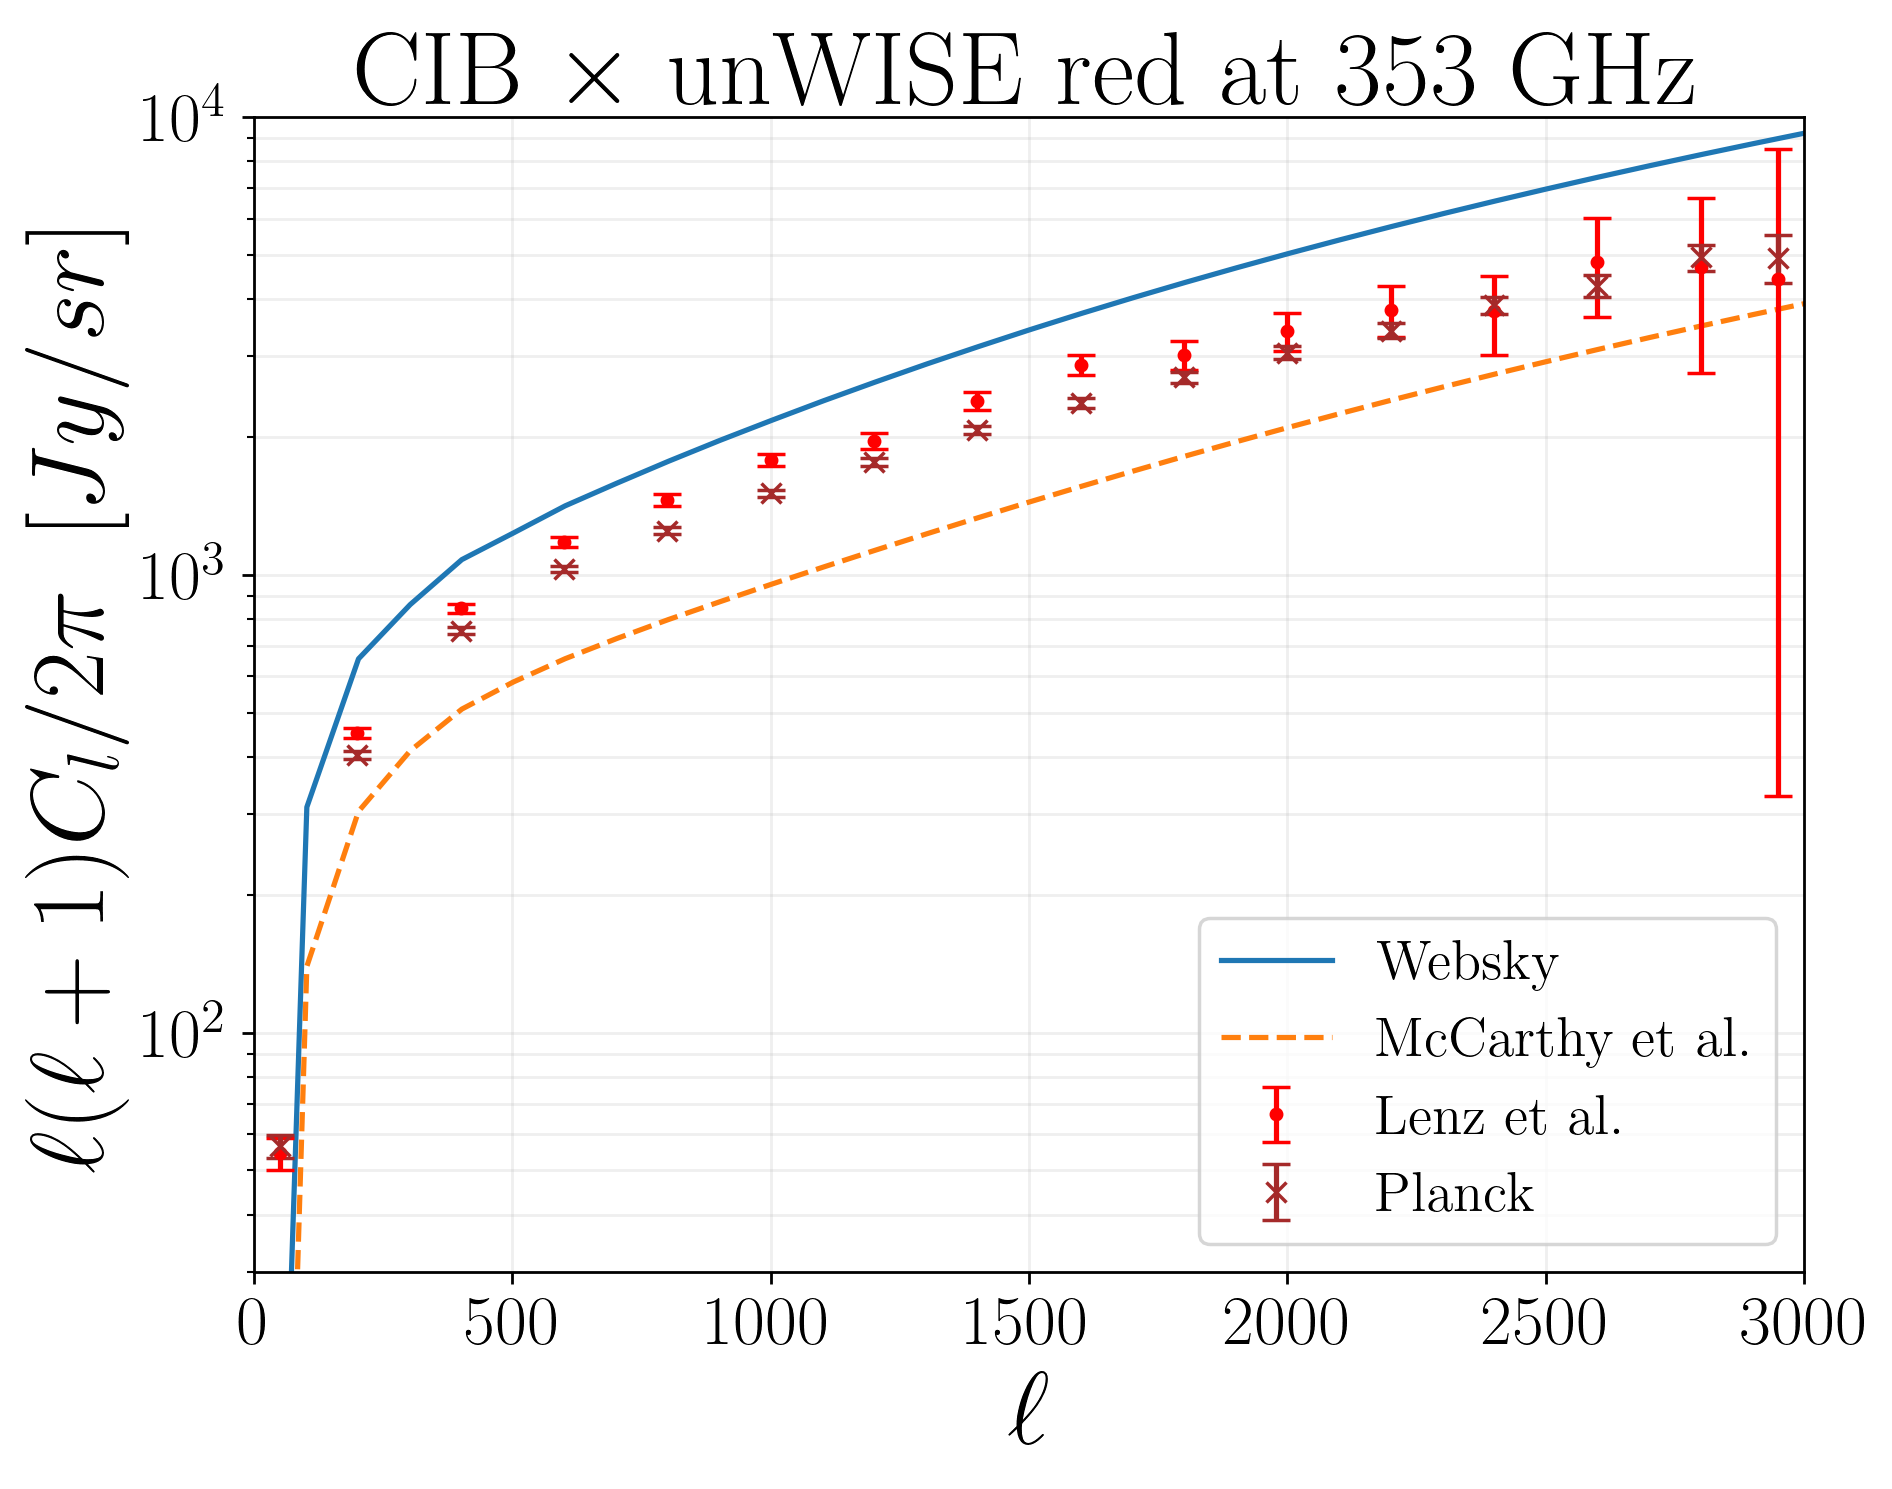

In [48]:
plt.figure(figsize=(8,6), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy/sr]$", fontsize=30)
plt.title(' CIB $\\times$ unWISE  %.5s at %.3i GHz'%( color, freq,), fontsize=30)
                                    
#plt.plot(ell, cl_cib_g+cl_cib_mu_tot , "-", label=r'Websky %.1i GHz, HOD1'%(freq))
#plt.plot(ell, cl_cib_g2+cl_cib_mu_tot2 , "--", label=r'Websky %.1i GHz, HOD2'%(freq))

#plt.plot(ell_f, cl_cib_g_f+cl_cib_mu_tot_f , "-", label=r'McCarthy %.1i GHz, HOD1'%(freq))
#plt.plot(ell_f2, cl_cib_g_f2+cl_cib_mu_tot_f2 , "-", label=r'McCarthy %.1i GHz, HOD2'%(freq))

plt.plot(ell, cl_cib_g+cl_cib_mu_tot , "-", label=r'Websky')
plt.plot(ell_f, cl_cib_g_f+cl_cib_mu_tot_f , "--", label=r'McCarthy et al.')

#Lenz data
plt.errorbar(ell_data, cl_lenz_blue*1e6, yerr = sigma_lenz_blue*1e6,  fmt= ".", color = color , capsize=4, label=" Lenz et al. ")
#plt.errorbar(ell_data, cl_planck_blue*1e6, yerr = sigma_planck_blue*1e6,  fmt= "x", color = "light"+color, capsize=4, label=" Planck")
plt.errorbar(ell_data, cl_planck_blue*1e6, yerr = sigma_planck_blue*1e6,  fmt= "x", color = "brown", capsize=4, label=" Planck")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3.e3)
plt.ylim(3e1,1.e4)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='lower right', fontsize=16)

# CIB x g corr

In [ ]:
from scipy import interpolate
ell_new = np.arange(50, 2000, )

In [ ]:
#CIB
df_cib_auto['353x353']
df_cib_auto['ell']
f_cib = interpolate.interp1d(df_cib_auto['ell'], df_cib_auto['353x353'], fill_value="extrapolate")

cib_inter = f_cib(ell_new)

In [ ]:
plt.plot(df_cib_auto['ell'], df_cib_auto['353x353'], "o", label = "data Lenz")
plt.plot(ell_new, cib_inter, label = "interpolated")

In [ ]:
#CIB x g 

f_gcib = interpolate.interp1d(ell_data, cl_lenz_blue*1e6*2*np.pi/ell_data/(ell_data+1),  fill_value="extrapolate")
gcib_inter = f_gcib(ell_new)

dl2cl_new = ell_new*(ell_new+1)/2/np.pi
dl2cl_data= ell_data*(ell_data+1)/2/np.pi

In [ ]:
plt.plot(ell_data, cl_lenz_blue*1e6/dl2cl_data, "o", label = "data Lenz")
plt.plot(ell_new, gcib_inter, label = "interpolated")

In [ ]:
path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"
path_cov = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/covariances/"

s_blue =  0.455
s_green =  0.648
s_red = 0.842


bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

if color == 'blue':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
    cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
if color == 'green':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
    cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
if color == 'red':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')
    cov = np.loadtxt(path_cov + "Covariance_7777_red.txt")

ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov
print(color)

In [ ]:
#g x g 
f_gg = interpolate.interp1d(ell_alex, cl_alex,  fill_value="extrapolate")
gg_inter = f_gg(ell_new)

dl2cl_new = ell_new*(ell_new+1)/2/np.pi
dl2cl_data= ell_data*(ell_data+1)/2/np.pi

In [ ]:
plt.plot(ell_alex, cl_alex, "o", label = "data Krolewski")
plt.plot(ell_new, gg_inter, label = "interpolated")

In [ ]:
corr = gcib_inter/np.sqrt(gg_inter*cib_inter)

plt.plot(ell_new, corr)

## compare with computed curves

In [ ]:
# #load class_sz curves 
# ell_f, cl_fiona = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-1-26_fionaCIB/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
# ell_wb, cl_websky = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-1-30_webskyCIB_40HOD/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

# ell_f2, cl_fiona2 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/1-30_Fionacib_40HOD/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
# ell_wb2, cl_websky2 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/1-30_webskycib_40HOD/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

# ell_f3, cl_fiona3 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/2-2_FionaCIB_40HODslighlyDifferent/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
# ell_wb3, cl_websky3 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/2-2_webskyCIB_40HODslighlyDifferent/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy/sr]$", fontsize=30)
plt.title(' CIB %.3i $\\times$ unWISE  %.5s'%( freq,color), fontsize=30)

plt.plot(ell_f, cl_fiona*convert_Jysr_to_uK(freq), "--", label = "Fiona")
plt.plot(ell_wb, cl_websky*convert_Jysr_to_uK(freq), "--", label = "websky")

plt.plot(ell_f2, cl_fiona2*convert_Jysr_to_uK(freq), label = "Fiona, HOD 1")
plt.plot(ell_wb2, cl_websky2*convert_Jysr_to_uK(freq), label = "websky, HOD 1")
plt.plot(ell_f3, cl_fiona3*convert_Jysr_to_uK(freq), label = "Fiona, HOD 2")
plt.plot(ell_wb3, cl_websky3*convert_Jysr_to_uK(freq), label = "websky, HOD 2")

plt.errorbar(ell_data, cl_lenz545_blue*1e6, yerr = sigma_lenz545_blue*1e6,  fmt= ".", color = color , capsize=4, label=" Lenz et al. ")
plt.errorbar(ell_data, cl_planck545_blue*1e6, yerr = sigma_planck545_blue*1e6,  fmt= "x", color = "light"+color, capsize=4, label=" Planck")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3.e3)
plt.ylim(1e0,8.e4)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
